In [1]:
import tensorflow as tf
import numpy as np
#The CIFAR-100 dataset consists of 60000 32x32 colour images in 10 classes, 
#with 6000 images per class. There are 50000 training images and 10000 test images.
from tensorflow.keras.datasets import cifar10
import matplotlib.pylab as plt

In [2]:
batch_size=100
num_classes=10
epochs=30


(xt,yt),(xtest,ytest)= cifar10.load_data()

_,rows, cols, channels = xt.shape

xt=xt.astype('float32')
xtest=xtest.astype('float32')

xt=xt/255
xtest=xtest/255

yt=tf.keras.utils.to_categorical(yt,num_classes)
ytest=tf.keras.utils.to_categorical(ytest,num_classes)

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
inputs=tf.keras.layers.Input(shape=(rows,cols,channels))
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(inputs)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)
 
x=tf.keras.layers.Flatten()(x) #Flatten = convert the image to an array
x=tf.keras.layers.Dense(512,activation='relu')(x)
x=tf.keras.layers.Dropout(0.5)(x)
x=tf.keras.layers.Dense(num_classes,activation='softmax')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [4]:
stochastic_gradient_descent = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.9)#SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=stochastic_gradient_descent,metrics=['categorical_accuracy'])

In [10]:
#the history get the history of the training
history=model.fit(xt,yt,batch_size=batch_size,epochs=5,verbose=1,validation_data=(xtest,ytest))

Epoch 1/5
500/500 [==============================] - 19s 39ms/step - loss: 0.4018 - categorical_accuracy: 0.8614 - val_loss: 0.7322 - val_categorical_accuracy: 0.7809
Epoch 2/5
500/500 [==============================] - 19s 38ms/step - loss: 0.3681 - categorical_accuracy: 0.8734 - val_loss: 0.8234 - val_categorical_accuracy: 0.7785
Epoch 3/5
500/500 [==============================] - 19s 38ms/step - loss: 0.3491 - categorical_accuracy: 0.8805 - val_loss: 0.7522 - val_categorical_accuracy: 0.7825
Epoch 4/5
500/500 [==============================] - 19s 38ms/step - loss: 0.3380 - categorical_accuracy: 0.8858 - val_loss: 0.7156 - val_categorical_accuracy: 0.7797
Epoch 5/5
500/500 [==============================] - 19s 38ms/step - loss: 0.3303 - categorical_accuracy: 0.8900 - val_loss: 0.7638 - val_categorical_accuracy: 0.7839


In [11]:
#Test the model
pointing = model.evaluate(xtest, ytest, verbose=1)
print(pointing)

313/313 [==============================] - 3s 9ms/step - loss: 0.7638 - categorical_accuracy: 0.7839
[0.7638322710990906, 0.7839000225067139]


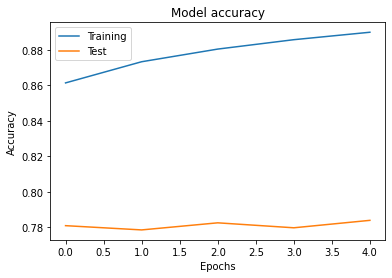

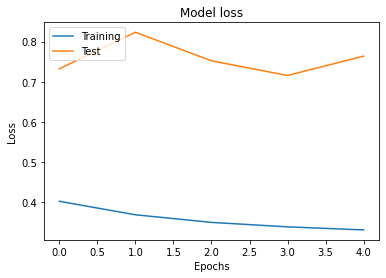

In [12]:
#plot the history
plt.figure(1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Test'], loc='upper left')

plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Test'], loc='upper left')

plt.show()